In [1]:
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil
import numpy as np
import pandas as pd
import random
import glob
import csv

## The file paths only need to changed according to your preference @Markus

In [2]:
# Define this path to save the preprocess data set
# This probably would change according to the folder where you are going to save the data
destination_folder = '../data/PKLOT/pklot_all_empty_sunny'
os.makedirs(destination_folder, exist_ok=True)


# Read and get the files as a list from the .csv
#csv_file_path = '../data/image_list.csv'    #=>  change this to the folder that consists the image_list

In [3]:
# Subject to the data set used: (Shoulb be flexivle with the type of the car lot)
image_width = 1280
image_height = 720

## --------------------------

In [4]:
#my_data_path = '../data/PKLot/Sunny_most_empty/images'

source_dataset_PUC_sunny = '../data/PKLot/PKLot/PUCPR/Sunny/'  # This would not be changed
source_dataset_UFPR04_sunny = '../data/PKLot/PKLot/UFPR04/Sunny/'
source_dataset_UFPR05_sunny = '../data/PKLot/PKLot/UFPR05/Sunny/'

In [5]:
# Write the files to a list
''' 
jpeg_list = os.listdir(my_data_path)

csv_file_path = '../data/image_list.csv'
# Writing the list to a CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for file_name in jpeg_list:
        csv_writer.writerow([file_name])
'''

# Read the list of file names from a .txt
''' 
# Initialize an empty list to store file names
jpeg_list = []

with open(csv_file_path, 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    # Read each row and append the file name to the list
    for row in csv_reader:
        if row:  # Check if the row is not empty
            jpeg_list.append(row[0])
'''

" \n# Initialize an empty list to store file names\njpeg_list = []\n\nwith open(csv_file_path, 'r') as csvfile:\n    csv_reader = csv.reader(csvfile)\n    # Read each row and append the file name to the list\n    for row in csv_reader:\n        if row:  # Check if the row is not empty\n            jpeg_list.append(row[0])\n"

In [6]:
# Function to Extracting the data from the original data and put them in the destination folder
''' 
def copy_selected_files(source_dataset, dest_folder = destination_folder):
    for day in os.listdir(source_dataset):
        path_to_check = os.path.join(source_dataset, day)
        if os.path.exists(path_to_check):
            for file in jpeg_list:
                image_file_path = os.path.join(path_to_check, file)
                xml_file_path = os.path.join(path_to_check, file[:10]+'.xml')

                if os.path.exists(image_file_path):
                # Copying the files to a dataset
                    shutil.copy(image_file_path, dest_folder)
                    print(f'File {image_file_path} copied to {dest_folder} Successfully!')
                else:
                    print(f'File {image_file_path} copied to {dest_folder} NOT Succsess!!')
                        
                if os.path.exists(xml_file_path):
                    shutil.copy(xml_file_path, dest_folder)
                    print(f'File {xml_file_path} copied to {dest_folder} Successfully!')
                else:
                    print(f'File {xml_file_path} copied to {dest_folder} NOT Succsess!!')
        
'''

" \ndef copy_selected_files(source_dataset, dest_folder = destination_folder):\n    for day in os.listdir(source_dataset):\n        path_to_check = os.path.join(source_dataset, day)\n        if os.path.exists(path_to_check):\n            for file in jpeg_list:\n                image_file_path = os.path.join(path_to_check, file)\n                xml_file_path = os.path.join(path_to_check, file[:10]+'.xml')\n\n                if os.path.exists(image_file_path):\n                # Copying the files to a dataset\n                    shutil.copy(image_file_path, dest_folder)\n                    print(f'File {image_file_path} copied to {dest_folder} Successfully!')\n                else:\n                    print(f'File {image_file_path} copied to {dest_folder} NOT Succsess!!')\n                        \n                if os.path.exists(xml_file_path):\n                    shutil.copy(xml_file_path, dest_folder)\n                    print(f'File {xml_file_path} copied to {dest_folder} Suc

In [7]:
# Function to Extracting the data from the original data and put them in the destination folder
def copy_all_files(source_dataset, dest_folder = destination_folder):
    for day in os.listdir(source_dataset):
        path_to_check = source_dataset + '/' + day
        jpeg_list = os.listdir(path_to_check)
        if os.path.exists(path_to_check):
            for file in jpeg_list:
                image_file_path = path_to_check + '/' + file
                xml_file_path = path_to_check + '/' + file[:10]+'.xml'

                if os.path.exists(image_file_path):
                    # Copying the files to a dataset
                    shutil.copy(image_file_path, dest_folder)
                    #print(f'File {image_file_path} copied to {dest_folder} Successfully!')
                #else:
                    #print(f'File {image_file_path} copied to {dest_folder} NOT Succsess!!')
                        
                if os.path.exists(xml_file_path):
                    shutil.copy(xml_file_path, dest_folder)
                    #print(f'File {xml_file_path} copied to {dest_folder} Successfully!')
                #else:
                   # print(f'File {xml_file_path} copied to {dest_folder} NOT Succsess!!')

In [8]:
# Calling the function to copy all the sunny data from all three lots to one destination folder
copy_all_files(source_dataset_PUC_sunny)
copy_all_files(source_dataset_UFPR04_sunny)
copy_all_files(source_dataset_UFPR05_sunny)

In [9]:
# Make the two folders inside datasets/images and datasets/labels_xml

images_path = destination_folder + '/' + 'images'
labels_xml_path = destination_folder + '/' + 'labels_xml'
labels_txt_path = destination_folder + '/' + 'labels_txt'

os.makedirs(images_path, exist_ok=True)
os.makedirs(labels_xml_path, exist_ok=True)
os.makedirs(labels_txt_path, exist_ok=True)


# Move images to 'images' folder
for filename in os.listdir(destination_folder):
    if filename.endswith(".jpg"):  # Assuming your images have a specific extension, like .jpg
        src_path = destination_folder + '/' + filename
        dest_path = images_path + '/' + filename
        shutil.move(src_path, dest_path)

# Move labels to 'labels_xml' folder
for filename in os.listdir(destination_folder):
    if filename.endswith(".xml"):  # Assuming your labels have a specific extension, like .xml
        src_path = destination_folder + '/' + filename
        dest_path = labels_xml_path + '/' + filename
        shutil.move(src_path, dest_path)

In [10]:
# Convert the ground truth such that it can be used to feed the training in YOLO

#  convert_single_xml_to_yolo(xml_file, img_width, img_height): => modified to take only the empty parking spaces in the images in PKLot_Non_occupied_original
# By setting occupied == 0 
 

def convert_xml_to_yolo(xml_folder, output_txt_folder, img_width, img_height):
    # Create output_txt_folder if it doesn't exist
    os.makedirs(output_txt_folder, exist_ok=True)

    for xml_file in os.listdir(xml_folder):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(xml_folder, xml_file)
            output_file = os.path.join(output_txt_folder, xml_file.replace('.xml', '.txt'))

            yolo_lines = convert_single_xml_to_yolo(xml_path, img_width, img_height)

            with open(output_file, 'w') as file:
                for line in yolo_lines:
                    file.write(line + '\n')

def convert_single_xml_to_yolo(xml_file, img_width, img_height):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    yolo_lines = []

    for space in root.findall('space'):
        occupied = int(space.get('occupied', 0))
        rotated_rect = space.find('rotatedRect')
        contour = space.find('contour')

        center_x = float(rotated_rect.find('center').get('x'))
        center_y = float(rotated_rect.find('center').get('y'))
        width = float(rotated_rect.find('size').get('w'))
        height = float(rotated_rect.find('size').get('h'))

        # Normalize coordinates and dimensions
        x_center_normalized = center_x / img_width
        y_center_normalized = center_y / img_height
        width_normalized = width / img_width
        height_normalized = height / img_height

        if occupied == 0:             #  => instead want to get occupied parking spaces remove this if or enable only occupied by == 1
            yolo_line = f"{occupied} {x_center_normalized} {y_center_normalized} {width_normalized} {height_normalized}"
            yolo_lines.append(yolo_line)

    return yolo_lines

In [11]:
convert_xml_to_yolo(labels_xml_path, labels_txt_path, image_width, image_height)

## Train, val, test split 

In [12]:
# Paths and settings
train_path = destination_folder + '/' + 'train'
val_path = destination_folder + '/' + 'val'
test_path = destination_folder + '/' + 'test'

os.makedirs(train_path + '/' + 'images', exist_ok=True)
os.makedirs(train_path + '/' + 'labels', exist_ok=True)
os.makedirs(val_path + '/' + 'images', exist_ok=True)
os.makedirs(val_path + '/' + 'labels', exist_ok=True)
os.makedirs(test_path + '/' + 'images', exist_ok=True)
os.makedirs(test_path + '/' + 'labels', exist_ok=True)

In [13]:
def save_files(files, im_source, destination_images, destination_labels):
    for file_path in files:
        # Extract file name without extension
        file_name = os.path.splitext(os.path.basename(file_path))[0]

        # Define paths for images and labels
        image_source_path = os.path.join(im_source, f"{file_name}.jpg")  # Assuming images have the same name as the labels with a different extension
        label_source_path = file_path

        image_destination_path = os.path.join(destination_images, f"{file_name}.jpg")
        label_destination_path = os.path.join(destination_labels, f"{file_name}.txt")

        # Copy or move image and label files to the destination
        shutil.copy(image_source_path, image_destination_path)  # Change to shutil.move if you want to move instead of copy
        shutil.copy(label_source_path, label_destination_path)

In [14]:
# Get all txt files and split them
txt_files = glob.glob(labels_txt_path + '/' + '*.txt')
random.shuffle(txt_files)

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_split = int(train_ratio * len(txt_files))
val_split = int((train_ratio + val_ratio) * len(txt_files))

train_files = txt_files[:train_split]
val_files = txt_files[train_split:val_split]
test_files = txt_files[val_split:]

# Process training, validation, and test files (same as before, but now includes selected_class)
save_files(train_files, images_path, train_path + '/' + 'images', train_path + '/' + 'labels')
save_files(val_files, images_path, val_path + '/' + 'images', val_path + '/' + 'labels')
save_files(test_files, images_path, test_path + '/' + 'images', test_path + '/' + 'labels')


# Test the extarcted data

## Get a random image (from destination_folder/train)


In [38]:
folder_path = destination_folder + '/'+ 'images'
annotation_path = destination_folder + '/'+ 'labels_xml'
no_of_imgs = 5


all_files = os.listdir(folder_path)

# Filter only .jpg files
jpg_files = [file for file in all_files if file.lower().endswith(".jpg")]

# Select a random .jpg file
#random_image = random.choice(jpg_files)  => select only one image
random_images = random.sample(jpg_files, no_of_imgs)

# image
paths_to_images = []
for each in random_images:
    paths_to_images.append(os.path.join(folder_path,each))

In [39]:
paths_to_images

['../data/PKLOT/pklot_all_empty_sunny/images/2012-09-13_14_50_28.jpg',
 '../data/PKLOT/pklot_all_empty_sunny/images/2012-12-23_09_25_05.jpg',
 '../data/PKLOT/pklot_all_empty_sunny/images/2013-04-11_15_40_10.jpg',
 '../data/PKLOT/pklot_all_empty_sunny/images/2013-04-15_12_15_06.jpg',
 '../data/PKLOT/pklot_all_empty_sunny/images/2013-04-09_16_25_11.jpg']

## Read the annotations

In [40]:
# Function to print groundtruth on a image
def print_GT(path , ground_truth , image):

    # Read the image with opencv
    imgocv = cv2.cvtColor(cv2.imread(os.path.join(path,image)), cv2.COLOR_BGR2RGB)

    # Specify the path to ground truth .xml
    xml_file_path = os.path.join(ground_truth, image[:-4]+'.xml')

    # Parse the XML file
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    bounding_boxes = []

    # Iterate over each space in the parking lot
    for space_element in root.findall('.//space'):
        space_id = space_element.get('id')
        occupied = space_element.get('occupied')
        center = space_element.find('.//rotatedRect/center')
        center_x = int(float(center.get('x')))
        center_y = int(float(center.get('y')))

        # Attempt to find the <contour> element directly under <space>
        contour_element = space_element.find('.//contour')
        
        if contour_element is not None:
            # Attempt to find <point> elements under <contour>
            contour_points = contour_element.findall('point')

            # Convert the list of points to a numpy array
            points_array = np.array([(int(point.get('x')), int(point.get('y'))) for point in contour_points], dtype=np.int32)

            # Check if enough points are available
            if len(points_array) >= 3:
                # Calculate the bounding box coordinates
                rect = cv2.minAreaRect(points_array)
                box = cv2.boxPoints(rect)
                box = box.astype(int)

                if occupied == '0':
                    bounding_boxes.append(box)
                    # Draw the bounding box on the copied image
                    cv2.drawContours(imgocv, [box], 0, (0, 255, 0), 2)
            else:
                print("Error: Not enough points for bounding box.")
        else:
            print("Error: <contour> element not found for the space.")

    return imgocv, bounding_boxes

In [45]:
def view_image(img_path, title = 'Title'):
    plt.figure(figsize=(12,9))
    plt.imshow(img_path)
    plt.title(title)
    plt.axis('off')
    plt.show()

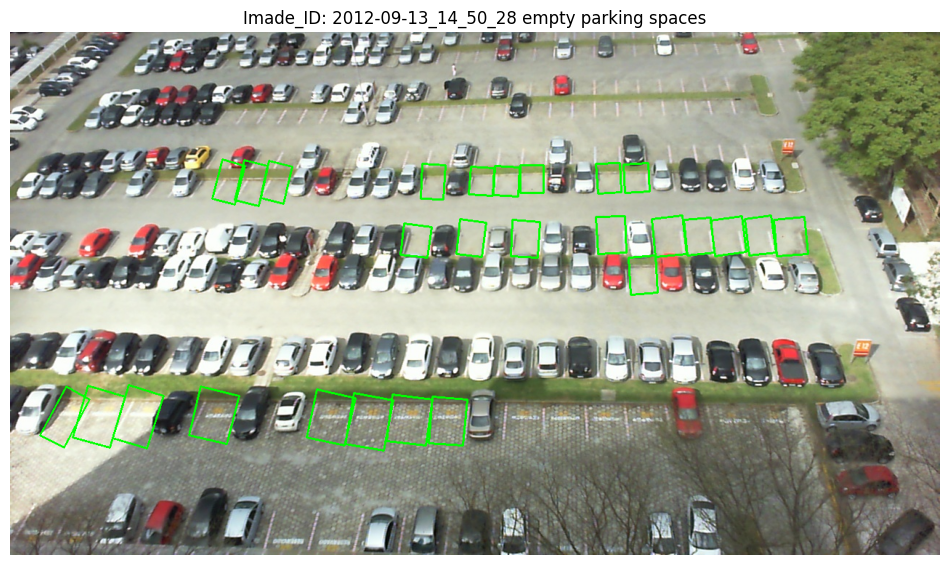

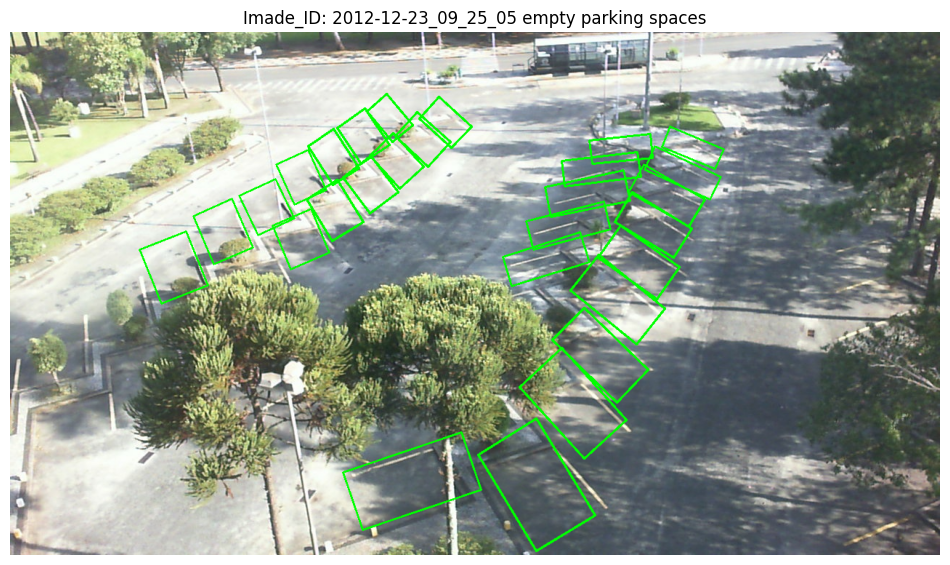

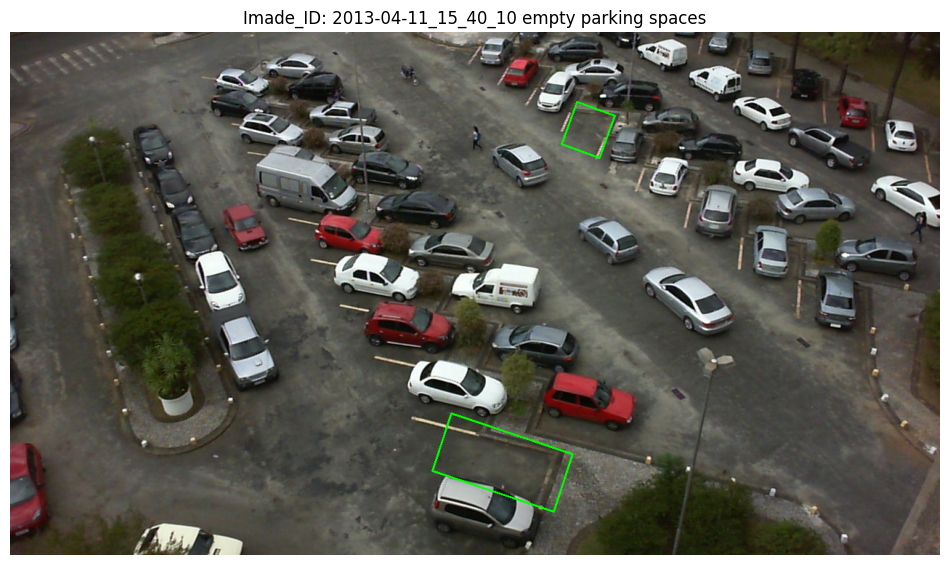

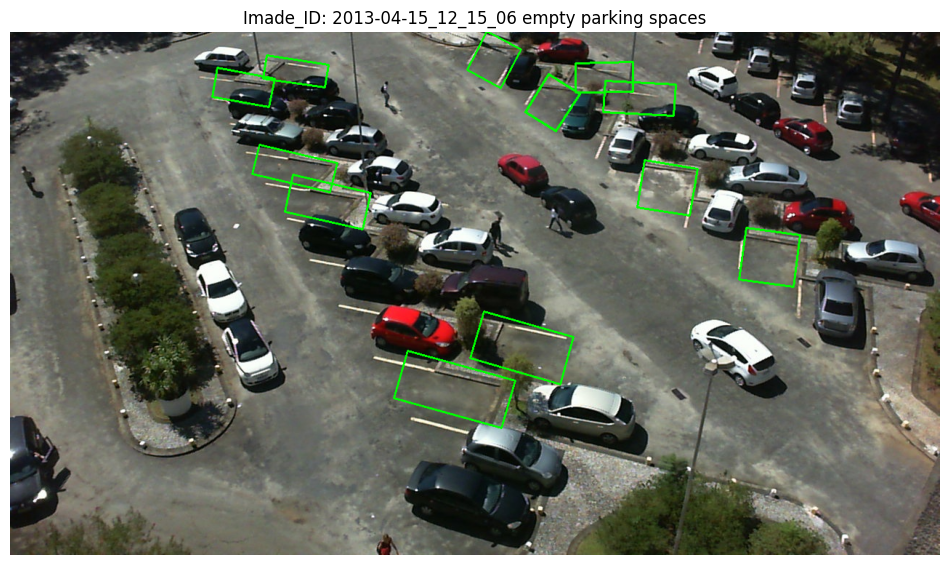

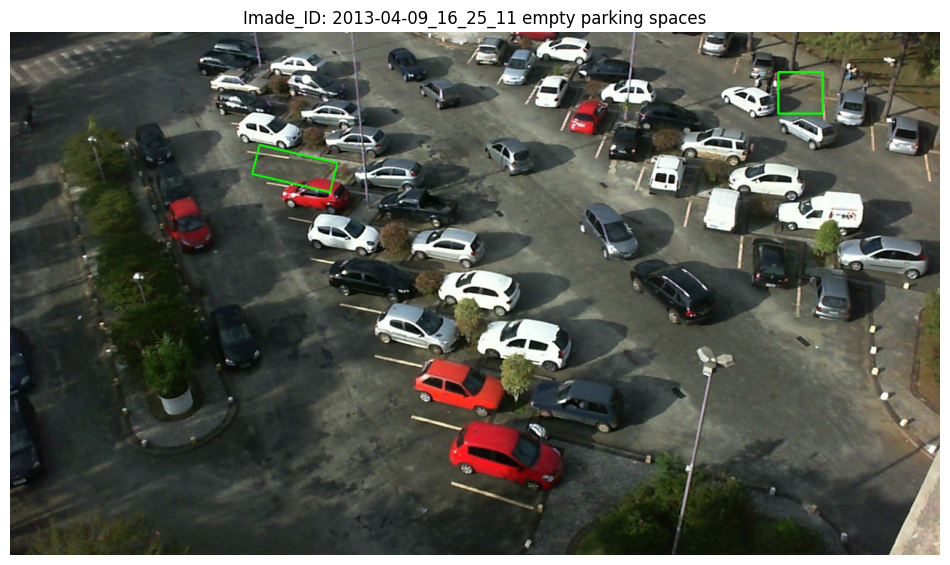

In [46]:
for each_image in random_images:
    gt_image, _ = print_GT(folder_path , annotation_path , each_image)
    view_image(gt_image, title=f'Imade_ID: {each_image[:-4]} empty parking spaces')